In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab_Notebooks/VPC_TP3'

/content/drive/MyDrive/Colab_Notebooks/VPC_TP3


Text(0.5, 1.0, 'Imagen original')

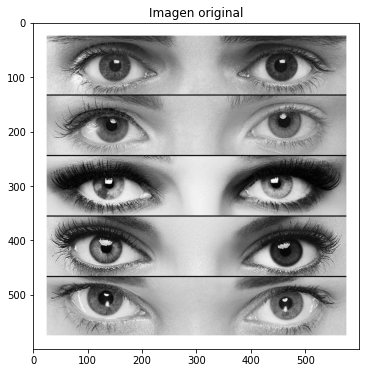

In [4]:
eyes = cv.imread('eyes.jpg', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1] # Cargo la imagen en RGB
gray = cv.cvtColor(eyes, cv.COLOR_RGB2GRAY) # Paso la imagen a escala de grises
fig = plt.figure(figsize=(15,6)), plt.imshow(gray, cmap = 'gray') # Grafico la imagen
plt.title('Imagen original')

# EYES DETECTOR

In [253]:
def eyes_detector(img, object_to_detect):
  if object_to_detect not in ('iris', 'pupilas'): raise ValueError("colobject_to_detector must be iris or pupil.")
  
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY) # Paso la imagen a escala de grises
  
  img_out = img.copy()

  # Iris detection
  set_blur = 5
  set_dp = 1.26
  set_minDist = 74
  set_param1 = 120
  set_param2 = 23
  set_minRadius = 27
  set_maxRadius = 31


  gray = cv.medianBlur(gray, set_blur) # Aplico filtro
  circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT, dp = set_dp, minDist = set_minDist, param1 = set_param1, param2 = set_param2, minRadius = set_minRadius, maxRadius = set_maxRadius)

  circles = np.uint16(np.around(circles))


  if object_to_detect == 'pupilas':
    set_blur = 7
    set_dp = 1
    set_minDist = 94
    set_param1 = 120 # higher threshold of the two passed to the Canny edge detector
    set_param2 = 10 # accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. 
    set_minRadius = 7
    set_maxRadius = 15

    # Genero máscara para ver solamente los íris

    auxCircles = circles.copy()
    auxCircles = auxCircles.reshape((10, 3))
    masks = []
    iris_mask = np.zeros_like(gray)

    for i in np.arange(0 , len(auxCircles)):      
      iris_mask = cv2.circle(iris_mask, (auxCircles[i,0], auxCircles[i,1]), int(auxCircles[i,2]/2), (255,255,255), -1)

    gray = gray *  iris_mask# Aplico filtro
    circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT, dp = set_dp, minDist = set_minDist, param1 = set_param1, param2 = set_param2, minRadius = set_minRadius, maxRadius = set_maxRadius)
    circles = np.uint16(np.around(circles))


  for i in circles[0,:]:
      # Dibujamos el círculo externo
      cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
      # Dibujamos el centro del círculo
      cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)

  print(circles)
  fig = plt.figure(figsize=(20,8)), plt.imshow(img_out) # Grafico la imagen
  plt.title('Imagen original')
  cv.waitKey(0)
  cv.destroyAllWindows()

  auxCircles = circles.copy()
  auxCircles = auxCircles.reshape((10, 3))

  from operator import itemgetter
  auxCirclesSorted = sorted(auxCircles, key=itemgetter(1))
  j = 1
  for i in np.arange(0, len(auxCirclesSorted)-1, 2):
    max = np.max([auxCirclesSorted[i][0], auxCirclesSorted[i + 1][0]])
    min = np.min([auxCirclesSorted[i][0], auxCirclesSorted[i + 1][0]])
    print('La distancia del ' + str(j) + '° par de ' + object_to_detect + ' es: ' + str((max - min)))
    j = j + 1
  
  return circles

# PRUEBAS

La distancia del 1° par de iris es: 306
La distancia del 2° par de iris es: 318
La distancia del 3° par de iris es: 310
La distancia del 4° par de iris es: 330
La distancia del 5° par de iris es: 333


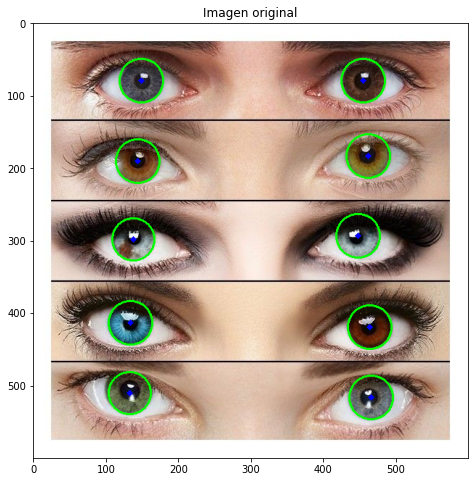

In [180]:
eyes_detector(eyes, 'iris')

[[[134 412  14]
  [448 292  14]
  [464 418  14]
  [144 190  14]
  [462 182  14]
  [454  80  14]
  [466 516  14]
  [150  80  14]
  [138 298  14]
  [134 510  13]]]
La distancia del 1° par de pupilas es: 304
La distancia del 2° par de pupilas es: 318
La distancia del 3° par de pupilas es: 310
La distancia del 4° par de pupilas es: 330
La distancia del 5° par de pupilas es: 332


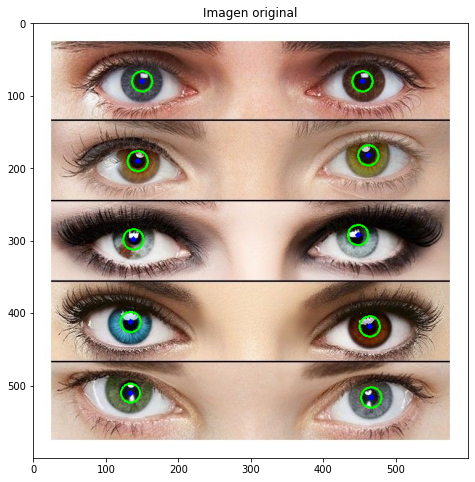

In [254]:
out = eyes_detector(eyes, 'pupilas')